In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
print(data.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop("id",axis=1,inplace=True)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
feature_mean=list(data.columns[1:10])
feature_se=list(data.columns[11:20])
feature_worst=list(data.columns[21:31])
all_features=list(data.columns[1:])
# prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']   

In [ ]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
print(data.head(100))

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           1       17.990         10.38          122.80     1001.0   
1           1       20.570         17.77          132.90     1326.0   
2           1       19.690         21.25          130.00     1203.0   
3           1       11.420         20.38           77.58      386.1   
4           1       20.290         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
95          1       20.260         23.03          132.40     1264.0   
96          0       12.180         17.84           77.79      451.1   
97          0        9.787         19.94           62.11      294.5   
98          0       11.600         12.84           74.34      412.6   
99          1       14.420         19.77           94.48      642.5   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760        0.300100             0.1

In [ ]:
train, test = train_test_split(data.head(500), test_size = 0.80)
print(train.shape)

(100, 31)


In [ ]:
train_X_mean=train[feature_mean]
train_Y_mean=train.diagnosis
test_X_mean=test[feature_mean]
test_Y_mean=test.diagnosis

In [ ]:
train_X_se=train[feature_se]
train_Y_se=train.diagnosis
test_X_se=test[feature_se]
test_Y_se=test.diagnosis

In [ ]:
train_X_worst=train[feature_worst]
train_Y_worst=train.diagnosis
test_X_worst=test[feature_worst]
test_Y_worst=test.diagnosis

In [ ]:
model_mean=LogisticRegression(random_state=10)
model_mean.fit(train_X_mean,train_Y_mean)
predict_mean=model_mean.predict(test_X_mean)
metrics.accuracy_score(predict_mean,test_Y_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.905

In [ ]:
model_se=LogisticRegression(random_state=10)
model_se.fit(train_X_se,train_Y_se)
predict_se=model_se.predict(test_X_se)
metrics.accuracy_score(predict_se,test_Y_se)

0.8825

In [ ]:
model_worst=LogisticRegression(random_state=10)
model_worst.fit(train_X_worst,train_Y_worst)
predict_worst=model_worst.predict(test_X_worst)
metrics.accuracy_score(predict_worst,test_Y_worst)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.935

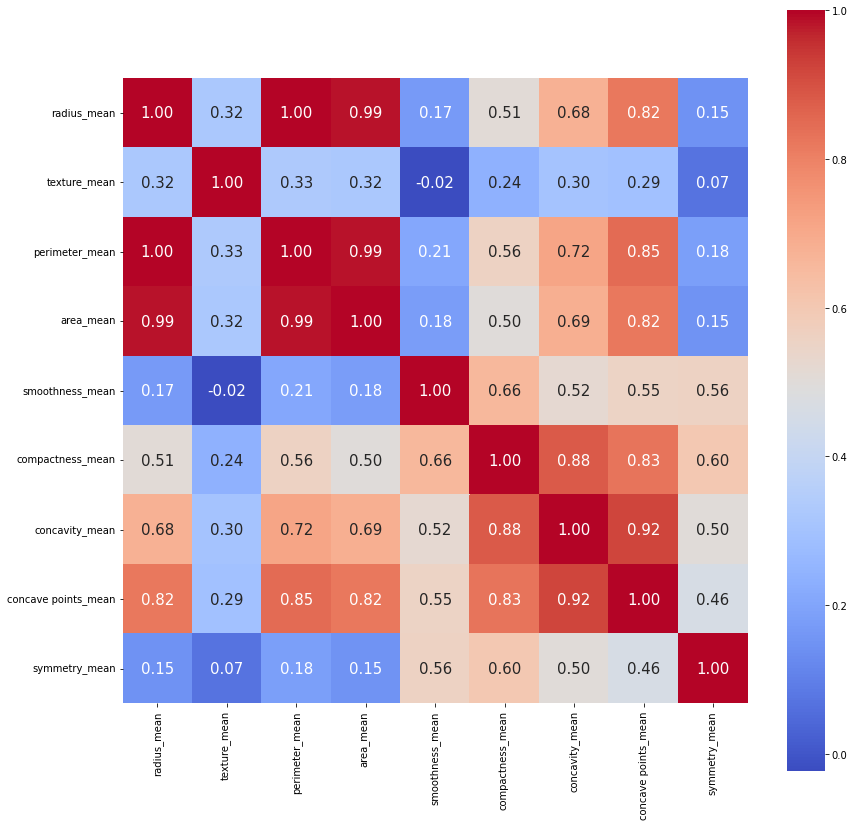

In [ ]:
corr = data[feature_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= feature_mean, yticklabels= feature_mean,
           cmap= 'coolwarm') 

In [ ]:
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']   

In [ ]:
ptrain_X=train[prediction_var]
ptrain_Y=train.diagnosis
ptest_X=test[prediction_var]
ptest_Y=test.diagnosis

In [ ]:
model_p=LogisticRegression(random_state=10)
model_p.fit(ptrain_X,ptrain_Y)
predict_p=model_p.predict(ptest_X)
metrics.accuracy_score(predict_p,ptest_Y)

0.8825

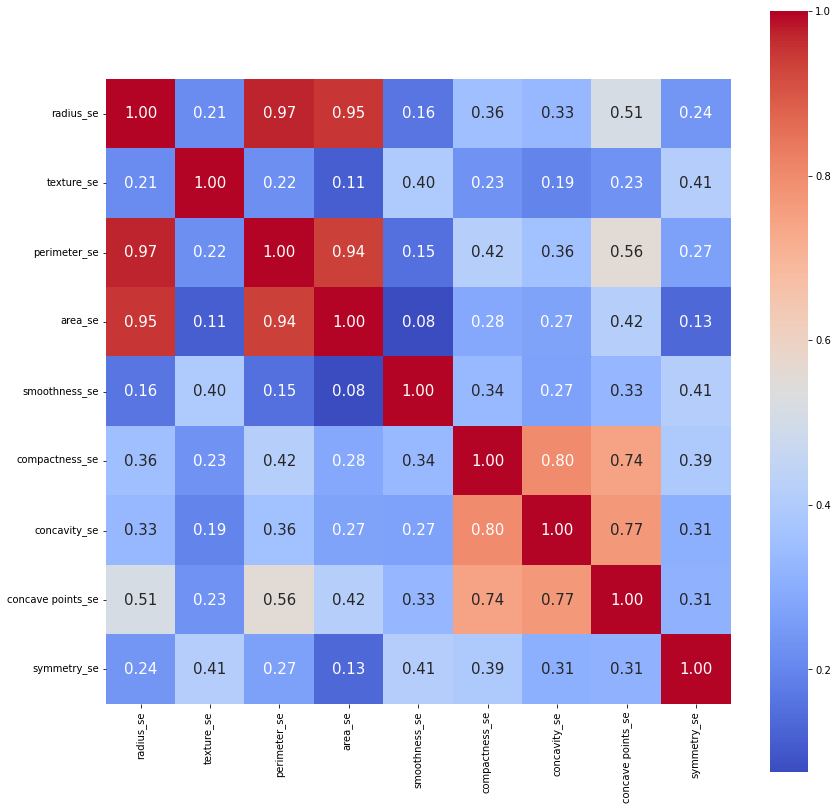

In [ ]:
corr = data[feature_se].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= feature_se, yticklabels= feature_se,
           cmap= 'coolwarm') 

In [ ]:
parameter_se=["texture_se","perimeter_se","concavity_se","smoothness_se","symmetry_se","concave points_se"]

In [ ]:
strain_X=train[parameter_se]
strain_Y=train.diagnosis
stest_X=test[parameter_se]
stest_Y=test.diagnosis

In [ ]:
model_s=LogisticRegression(random_state=10)
model_s.fit(strain_X,strain_Y)
predict_s=model_s.predict(stest_X)
metrics.accuracy_score(predict_s,stest_Y)

0.83

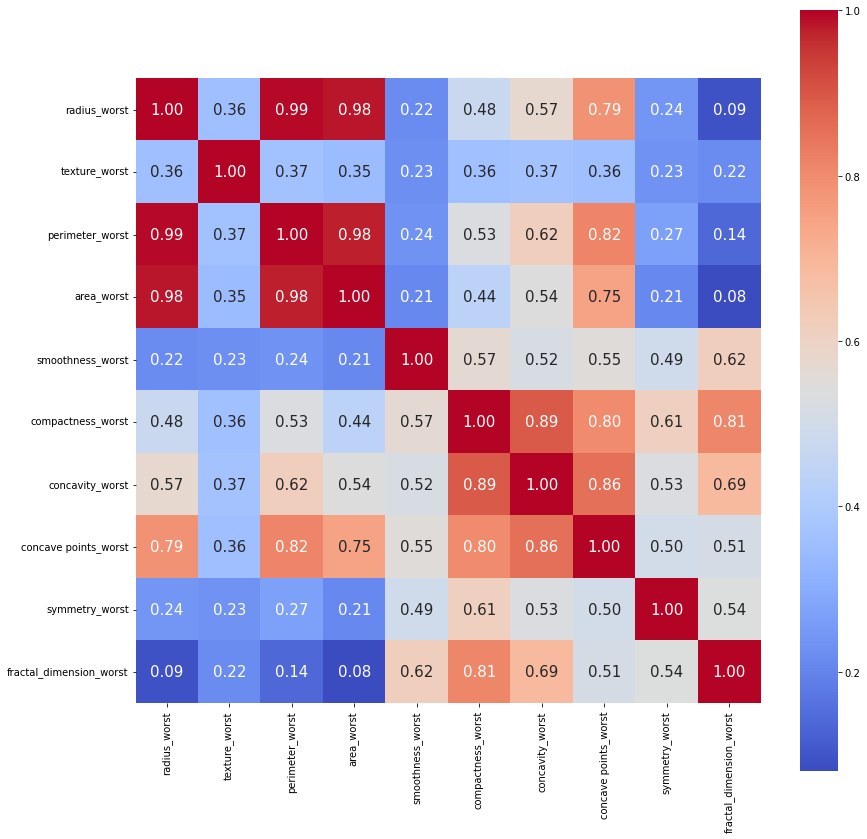

In [ ]:
corr = data[feature_worst].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= feature_worst, yticklabels= feature_worst,
           cmap= 'coolwarm') 

In [ ]:
paramater_w=["radius_worst","concavity_worst","smoothness_worst","symmetry_worst","fractal_dimension_worst"]

In [ ]:
wtrain_X=train[paramater_w]
wtrain_Y=train.diagnosis
wtest_X=test[paramater_w]
wtest_Y=test.diagnosis

In [ ]:
model_w=LogisticRegression(random_state=10)
model_w.fit(wtrain_X,wtrain_Y)
predict_w=model_w.predict(wtest_X)
metrics.accuracy_score(predict_w,wtest_Y)

0.92

In [ ]:
all_Train_X=train[all_features]
all_Train_Y=train.diagnosis
all_Test_X=test[all_features]
all_Test_Y=test.diagnosis

In [ ]:
all_model=LogisticRegression(random_state=10)
all_model.fit(all_Train_X,all_Train_Y)
all_predict=all_model.predict(all_Test_X)
metrics.accuracy_score(all_predict,all_Test_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.94

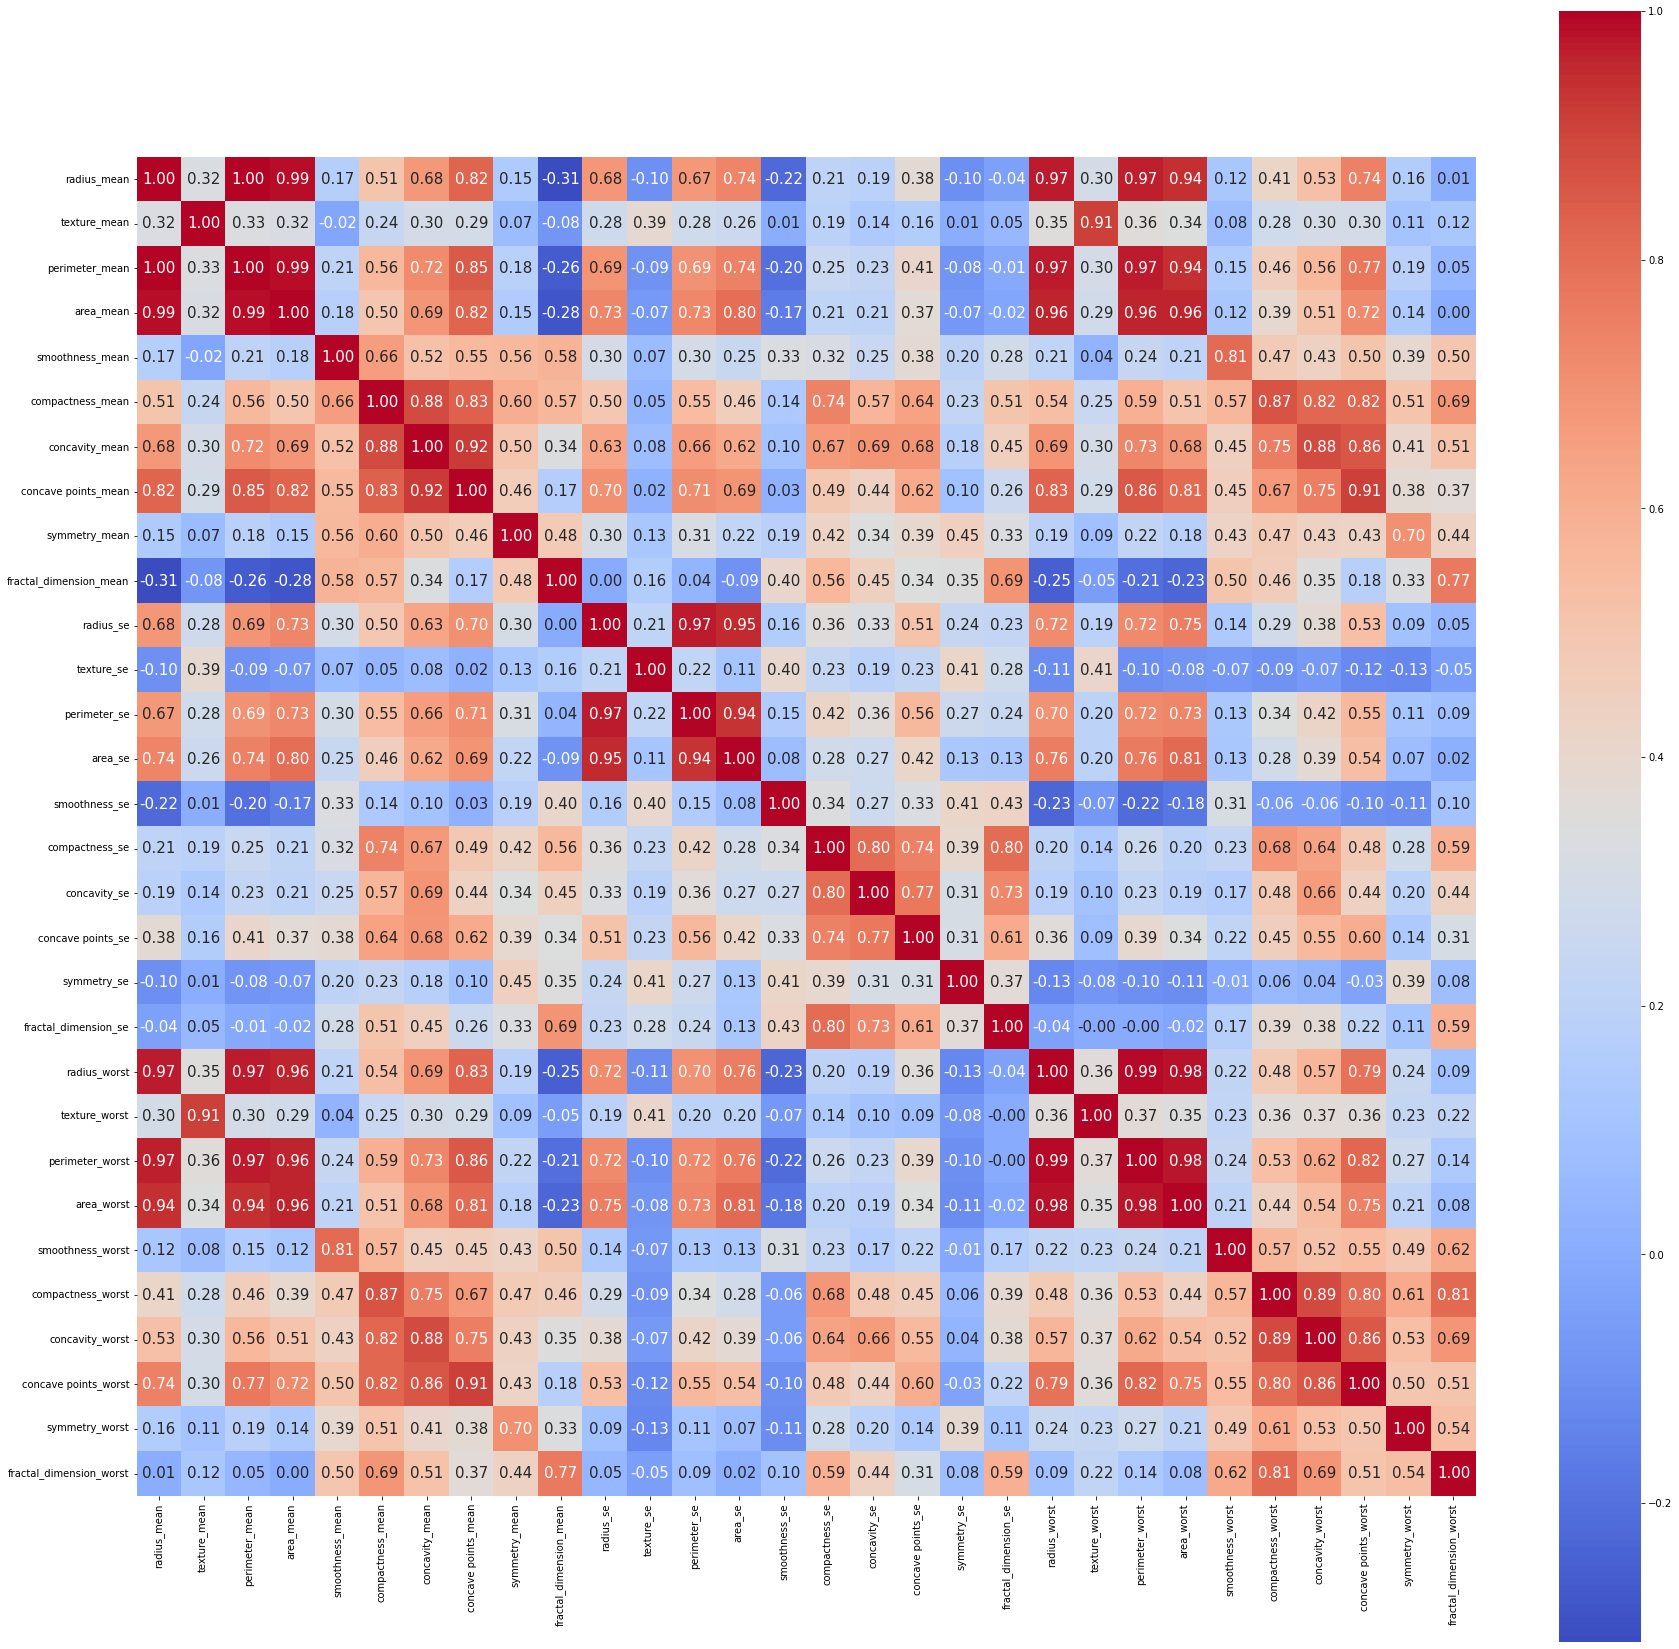

In [ ]:
corr = data[all_features].corr() # .corr is used for find corelation
plt.figure(figsize=(30,30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= all_features, yticklabels= all_features,
           cmap= 'coolwarm') 

In [ ]:
parameter_z = ["radius_mean","radius_se","concavity_mean","compactness_se","symmetry_se","symmetry_mean","symmetry_worst","texture_mean","texture_se","smoothness_mean","smoothness_se"]

In [ ]:
ztrain_X=train[parameter_z]
ztrain_Y=train.diagnosis
ztest_X=test[parameter_z]
ztest_Y=test.diagnosis

In [ ]:
model_z=LogisticRegression(random_state=10)
model_z.fit(ztrain_X,ztrain_Y)
predict_z=model_z.predict(ztest_X)
metrics.accuracy_score(predict_z,ztest_Y)

0.9025